In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error
import copy

Размер изображения: (675, 1200)


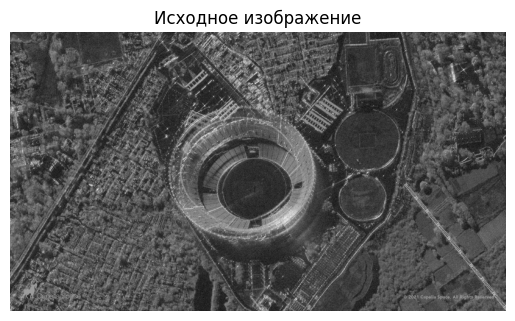

In [2]:
# Загрузка изображения в оттенках серого sar_1_gray.jpg
image = cv2.imread('C:/ImageProcessing/labs/Noise_Filtering/sar_1.jpg')
if image is None:
    print("Изображение не найдено")
    exit()

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(f"Размер изображения: {image_gray.shape}")
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

Зашумить изображение при помощи шума гаусса, постоянного шума.

In [3]:
# фильтр Гаусса
mean = 0
stddev = 50
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray, noise_gauss)

# фильтр соль-перец
noise_sp = np.random.randint(0, 101, size=image_gray.shape, dtype=int)
zeros_pixel = np.where(noise_sp < 5)
ones_pixel = np.where(noise_sp > 95)
image_sp = copy.deepcopy(image_gray)
image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

# Постоянный шум
constant_noise = np.full(image_gray.shape, 30, dtype=np.uint8)
image_constant_noise = cv2.add(image_gray, constant_noise)

print("Добавлены три типа шумов: Гауссов, соль-перец, постоянный")

Добавлены три типа шумов: Гауссов, соль-перец, постоянный


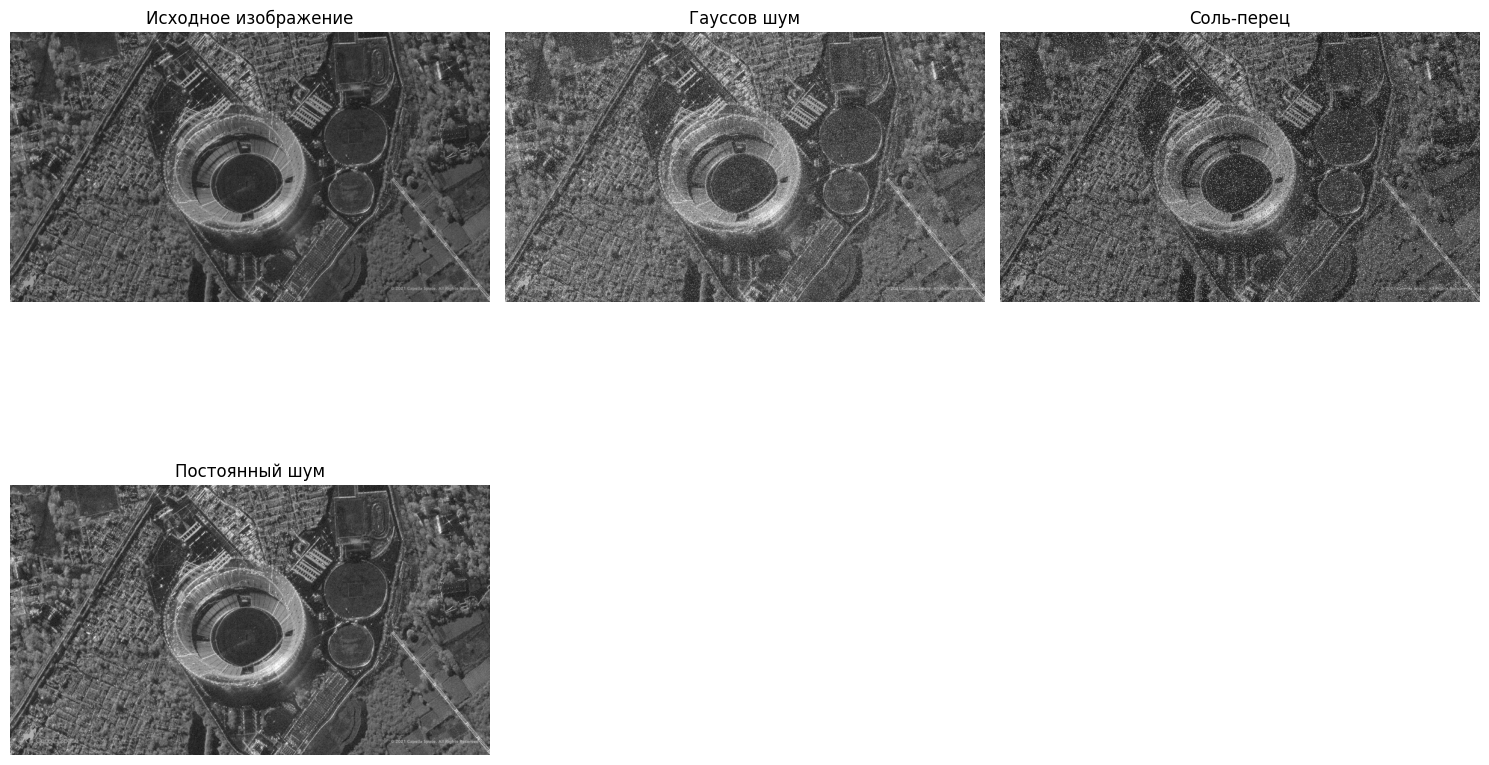

In [4]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title('Гауссов шум')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_sp, cmap='gray')
plt.title('Соль-перец')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(image_constant_noise, cmap='gray')
plt.title('Постоянный шум')
plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Тестирование фильтров для Гауссова шума
print("ФИЛЬТРАЦИЯ ГАУССОВА ШУМА:")
print("=" * 50)

# Медианный фильтр
image_gauss_median3 = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_median5 = cv2.medianBlur(image_noise_gauss, 5)

# Фильтр Гаусса
image_gauss_gauss3 = cv2.GaussianBlur(image_noise_gauss, (3, 3), 0)
image_gauss_gauss5 = cv2.GaussianBlur(image_noise_gauss, (5, 5), 0)
image_gauss_gauss7 = cv2.GaussianBlur(image_noise_gauss, (7, 7), 0)

# Билатеральный фильтр
image_gauss_bilat1 = cv2.bilateralFilter(image_noise_gauss, 9, 50, 50)
image_gauss_bilat2 = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
image_gauss_bilat3 = cv2.bilateralFilter(image_noise_gauss, 9, 100, 100)

# Фильтр нелокальных средних
image_gauss_nlm1 = cv2.fastNlMeansDenoising(image_noise_gauss, h=10)
image_gauss_nlm2 = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)
image_gauss_nlm3 = cv2.fastNlMeansDenoising(image_noise_gauss, h=30)

print("Применены различные фильтры для Гауссова шума")

ФИЛЬТРАЦИЯ ГАУССОВА ШУМА:
Применены различные фильтры для Гауссова шума


In [6]:
# Сравнение результатов для гауссова шума
filters_gauss = [
    ('Медианный 3x3', image_gauss_median3),
    ('Медианный 5x5', image_gauss_median5),
    ('Гаусс 3x3', image_gauss_gauss3),
    ('Гаусс 5x5', image_gauss_gauss5),
    ('Гаусс 7x7', image_gauss_gauss7),
    ('Билатеральный 50', image_gauss_bilat1),
    ('Билатеральный 75', image_gauss_bilat2),
    ('Билатеральный 100', image_gauss_bilat3),
    ('NLM h=10', image_gauss_nlm1),
    ('NLM h=20', image_gauss_nlm2),
    ('NLM h=30', image_gauss_nlm3)
]

best_mse_gauss = float('inf')
best_ssim_gauss = -1
best_filter_gauss = ""

print("Результаты для гауссова шума:")
for name, filtered_image in filters_gauss:
    mse = mean_squared_error(image_gray, filtered_image)
    ssim = structural_similarity(image_gray, filtered_image)
    
    print(f"{name}: MSE={mse:.2f}, SSIM={ssim:.4f}")
    
    if mse < best_mse_gauss and ssim > best_ssim_gauss:
        best_mse_gauss = mse
        best_ssim_gauss = ssim
        best_filter_gauss = name

print(f"\nЛучший фильтр для гауссова шума: {best_filter_gauss}")
print(f"MSE: {best_mse_gauss:.2f}, SSIM: {best_ssim_gauss:.4f}")

Результаты для гауссова шума:
Медианный 3x3: MSE=376.45, SSIM=0.6355
Медианный 5x5: MSE=378.74, SSIM=0.5689
Гаусс 3x3: MSE=580.36, SSIM=0.6659
Гаусс 5x5: MSE=570.35, SSIM=0.6624
Гаусс 7x7: MSE=594.41, SSIM=0.6163
Билатеральный 50: MSE=551.17, SSIM=0.5683
Билатеральный 75: MSE=535.17, SSIM=0.5819
Билатеральный 100: MSE=569.76, SSIM=0.5557
NLM h=10: MSE=1239.18, SSIM=0.4099
NLM h=20: MSE=701.94, SSIM=0.5732
NLM h=30: MSE=601.79, SSIM=0.5086

Лучший фильтр для гауссова шума: Медианный 3x3
MSE: 376.45, SSIM: 0.6355


In [7]:
# Тестирование фильтров для шума соль-перец
print("\nФИЛЬТРАЦИЯ ШУМА СОЛЬ-ПЕРЕЦ:")
print("=" * 50)

# Медианный фильтр
image_sp_median3 = cv2.medianBlur(image_sp, 3)
image_sp_median5 = cv2.medianBlur(image_sp, 5)

# Фильтр Гаусса
image_sp_gauss3 = cv2.GaussianBlur(image_sp, (3, 3), 0)
image_sp_gauss5 = cv2.GaussianBlur(image_sp, (5, 5), 0)

# Билатеральный фильтр
image_sp_bilat = cv2.bilateralFilter(image_sp, 9, 75, 75)

# Фильтр нелокальных средних
image_sp_nlm = cv2.fastNlMeansDenoising(image_sp, h=20)

print("Применены различные фильтры для шума соль-перец")


ФИЛЬТРАЦИЯ ШУМА СОЛЬ-ПЕРЕЦ:
Применены различные фильтры для шума соль-перец


In [8]:
filters_sp = [
    ('Медианный 3x3', image_sp_median3),
    ('Медианный 5x5', image_sp_median5),
    ('Гаусс 3x3', image_sp_gauss3),
    ('Гаусс 5x5', image_sp_gauss5),
    ('Билатеральный', image_sp_bilat),
    ('NLM h=20', image_sp_nlm)
]

best_mse_sp = float('inf')
best_ssim_sp = -1
best_filter_sp = ""

print("Результаты для шума соль-перец:")
for name, filtered_image in filters_sp:
    mse = mean_squared_error(image_gray, filtered_image)
    ssim = structural_similarity(image_gray, filtered_image)
    
    print(f"{name}: MSE={mse:.2f}, SSIM={ssim:.4f}")
    
    if mse < best_mse_sp and ssim > best_ssim_sp:
        best_mse_sp = mse
        best_ssim_sp = ssim
        best_filter_sp = name

print(f"\nЛучший фильтр для шума соль-перец: {best_filter_sp}")
print(f"MSE: {best_mse_sp:.2f}, SSIM: {best_ssim_sp:.4f}")

Результаты для шума соль-перец:
Медианный 3x3: MSE=108.10, SSIM=0.8023
Медианный 5x5: MSE=198.85, SSIM=0.6289
Гаусс 3x3: MSE=373.91, SSIM=0.5461
Гаусс 5x5: MSE=295.41, SSIM=0.5746
Билатеральный: MSE=805.52, SSIM=0.3191
NLM h=20: MSE=1729.10, SSIM=0.3064

Лучший фильтр для шума соль-перец: Медианный 3x3
MSE: 108.10, SSIM: 0.8023


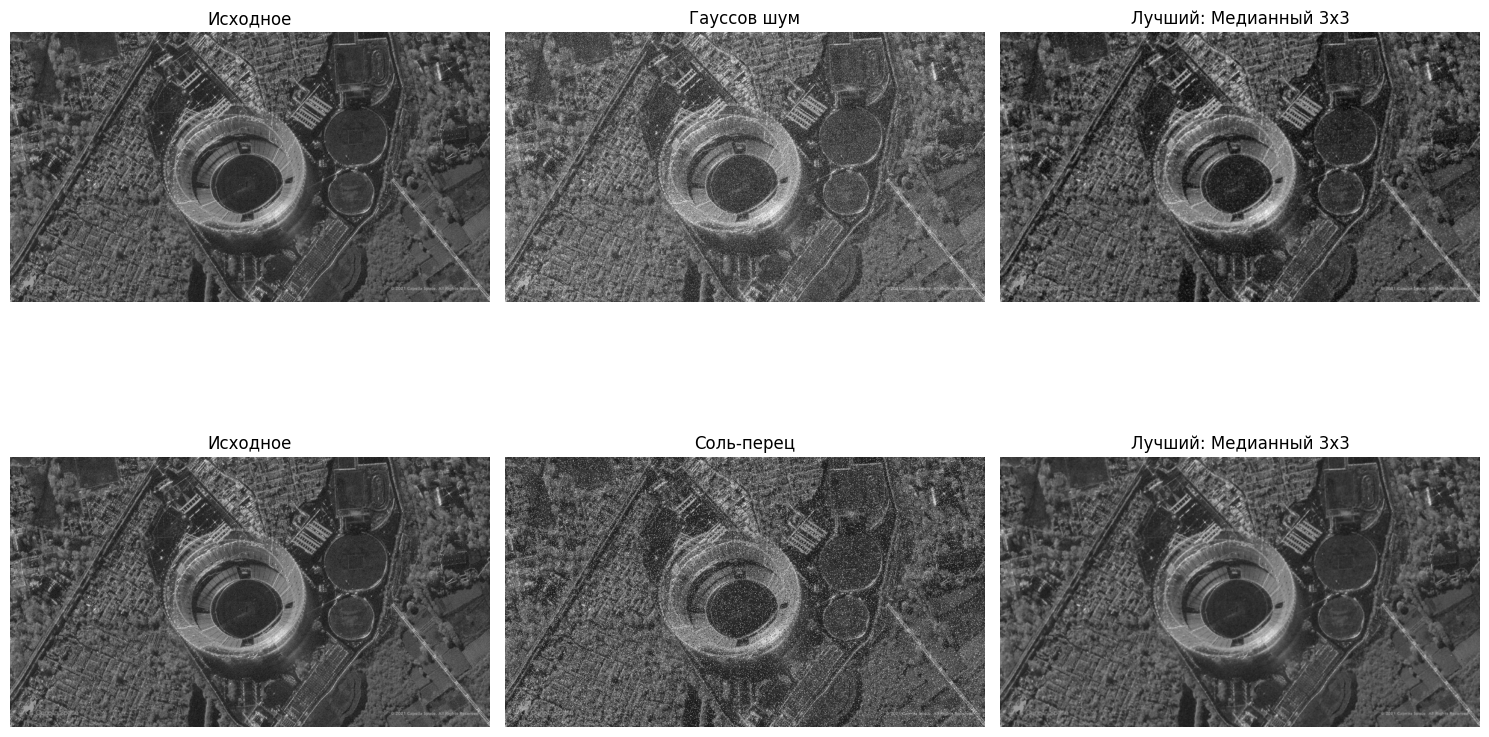

In [9]:
# Визуализация лучших результатов
best_gauss_image = next(img for name, img in filters_gauss if name == best_filter_gauss)
best_sp_image = next(img for name, img in filters_sp if name == best_filter_sp)

plt.figure(figsize=(15, 10))

# Лучшие результаты для гауссова шума
plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title('Гауссов шум')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(best_gauss_image, cmap='gray')
plt.title(f'Лучший: {best_filter_gauss}')
plt.axis('off')

# Лучшие результаты для шума соль-перец
plt.subplot(2, 3, 4)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(image_sp, cmap='gray')
plt.title('Соль-перец')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(best_sp_image, cmap='gray')
plt.title(f'Лучший: {best_filter_sp}')
plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Итоговый вывод
print("\nИТОГОВЫЕ РЕЗУЛЬТАТЫ:")
print("=" * 50)
print(f"Для гауссова шума лучший: {best_filter_gauss}")
print(f"Для шума соль-перец лучший: {best_filter_sp}")


ИТОГОВЫЕ РЕЗУЛЬТАТЫ:
Для гауссова шума лучший: Медианный 3x3
Для шума соль-перец лучший: Медианный 3x3
